# G2M insight for Cab Investment firm

## Client Description:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project Details:

We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

## Datasets:

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:

###### Cab_Data.csv – this file includes details of transaction for 2 cab companies
###### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
###### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
###### City.csv – this file contains list of US cities, their population and number of cab users

## Import libraries and load datasets

In [107]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Load the data sets
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
customer_df = pd.read_csv('DataSets/Customer_ID.csv')
transaction_df = pd.read_csv('DataSets/Transaction_ID.csv')
city_df = pd.read_csv('DataSets/City.csv')

After loading the datasets as dataframe, we will have a look at them by printing their shape and the first five rows for each dataset.

In [109]:
# Explore the cab dataset
print("\nCab data shape: ", cab_df.shape)
print("\nCab data head: \n", cab_df.head())
print("\nCab data info: \n", cab_df.info())
print("\nCab data description: \n", cab_df.describe())

# Explore the customer dataset
print("\nCustomer data shape: ", customer_df.shape)
print("\nCustomer data head: \n", customer_df.head())
print("\nCustomer data info: \n", customer_df.info())
print("\nCustomer data description: \n", customer_df.describe())

# Explore the transation dataset
print("\nTransaction data shape: ", transaction_df.shape)
print("\nTransaction data head: \n", transaction_df.head())
print("\nTransaction data info: \n", transaction_df.info())
print("\nTransaction data description: \n", transaction_df.describe())

# Explore the city dataset
print("\nCity data shape: ", city_df.shape)
print("\nCity data head: \n", city_df.head())
print("\nCity data info: \n", city_df.info())
print("\nCity data description: \n", city_df.describe())


Cab data shape:  (359392, 7)

Cab data head: 
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         

## Data Cleaning and Reformating:

The date format on the Cab_Data.csv dataset is not in the correct format so after loading the datasets, we created a function to modify the format of the 'Date to Travel' column so that it matches the following format:"d-m-Y". We then create a new column in the dataframe with the updated travel date.

In [110]:
def format_to_date(date):
    date_of_travel =(datetime(1899,12,30) + timedelta(date-1)).strftime("%d-%m-%Y")
    updated_date =  datetime.strptime(date_of_travel, "%d-%m-%Y")
    return updated_date

In [111]:
cab_df['Updated date of travel'] = cab_df['Date of Travel'].apply(lambda x:format_to_date(x))
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


Next we check for missing values in each dataset and if there are missing values, we will fill them. If not we will continue with our data cleaning.

In [112]:
# Check for missing values in each data set
print("\nMissing values in Cab data: \n", cab_df.isnull().sum())
print("\nMissing values in Customer data: \n", customer_df.isnull().sum())
print("\nMissing values in Transaction data: \n", transaction_df.isnull().sum())
print("\nMissing values in City data: \n", city_df.isnull().sum())


Missing values in Cab data: 
 Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Updated date of travel    0
dtype: int64

Missing values in Customer data: 
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Missing values in Transaction data: 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Missing values in City data: 
 City          0
Population    0
Users         0
dtype: int64


No values were found missing so the next step will be to merge the datasets based on common features. 

In [113]:
# Merge the data sets based on the common keys
merged_df = pd.merge(cab_df, transaction_df, on='Transaction ID')
merged_df = pd.merge(merged_df, city_df, on='City')
merged_df = pd.merge(merged_df, customer_df, on = 'Customer ID')
print("\nMerged data set shape: ", merged_df.shape)


Merged data set shape:  (359392, 15)


In [114]:
# Explore the merged dataset
print("\nmerged data shape: ", merged_df.shape)
print("\nmerged data head: \n", merged_df.head())
print("\nmerged data info: \n", merged_df.info())
print("\nmerged data description: \n", merged_df.describe())


merged data shape:  (359392, 15)

merged data head: 
    Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Updated date of travel  Customer ID  \
0         370.95      313.6350             2016-01-07        29290   
1         598.70      317.4228             2018-07-20        29290   
2         792.05      597.4020             2018-11-22        29290   
3         358.52      334.8540             2016-01-05        27703   
4         721.10      467.1192             2018-04-20        27703   

  Payment_Mode Population     Users Gender  Age  Income (USD/Month)  
0  

After merging the datasets, we check for any duplicates. If duplicates are found, they will be dropped. 

In [115]:
# Drop duplicate rows if any
if merged_df.drop_duplicates(inplace=True):
    print("\nMerged data set shape after dropping duplicates: ", merged_df.shape)
else:
    print("\nNo duplicates to drop.")


No duplicates to drop.


## Data Visualisations:

In our merged table, we can see that the price charged by the cab companies is different from the cost of the trips. It would be interesting for us to have. a preview of the profits made for each trip.

In [116]:
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-07,29290,Card,"814,885","24,701",Male,28,10813,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-20,29290,Cash,"814,885","24,701",Male,28,10813,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-22,29290,Card,"814,885","24,701",Male,28,10813,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-05,27703,Card,"814,885","24,701",Male,27,9237,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-20,27703,Card,"814,885","24,701",Male,27,9237,253.9808


In [117]:
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df['Cab Users %'] = city_df['Users'] / city_df['Population'] * 100

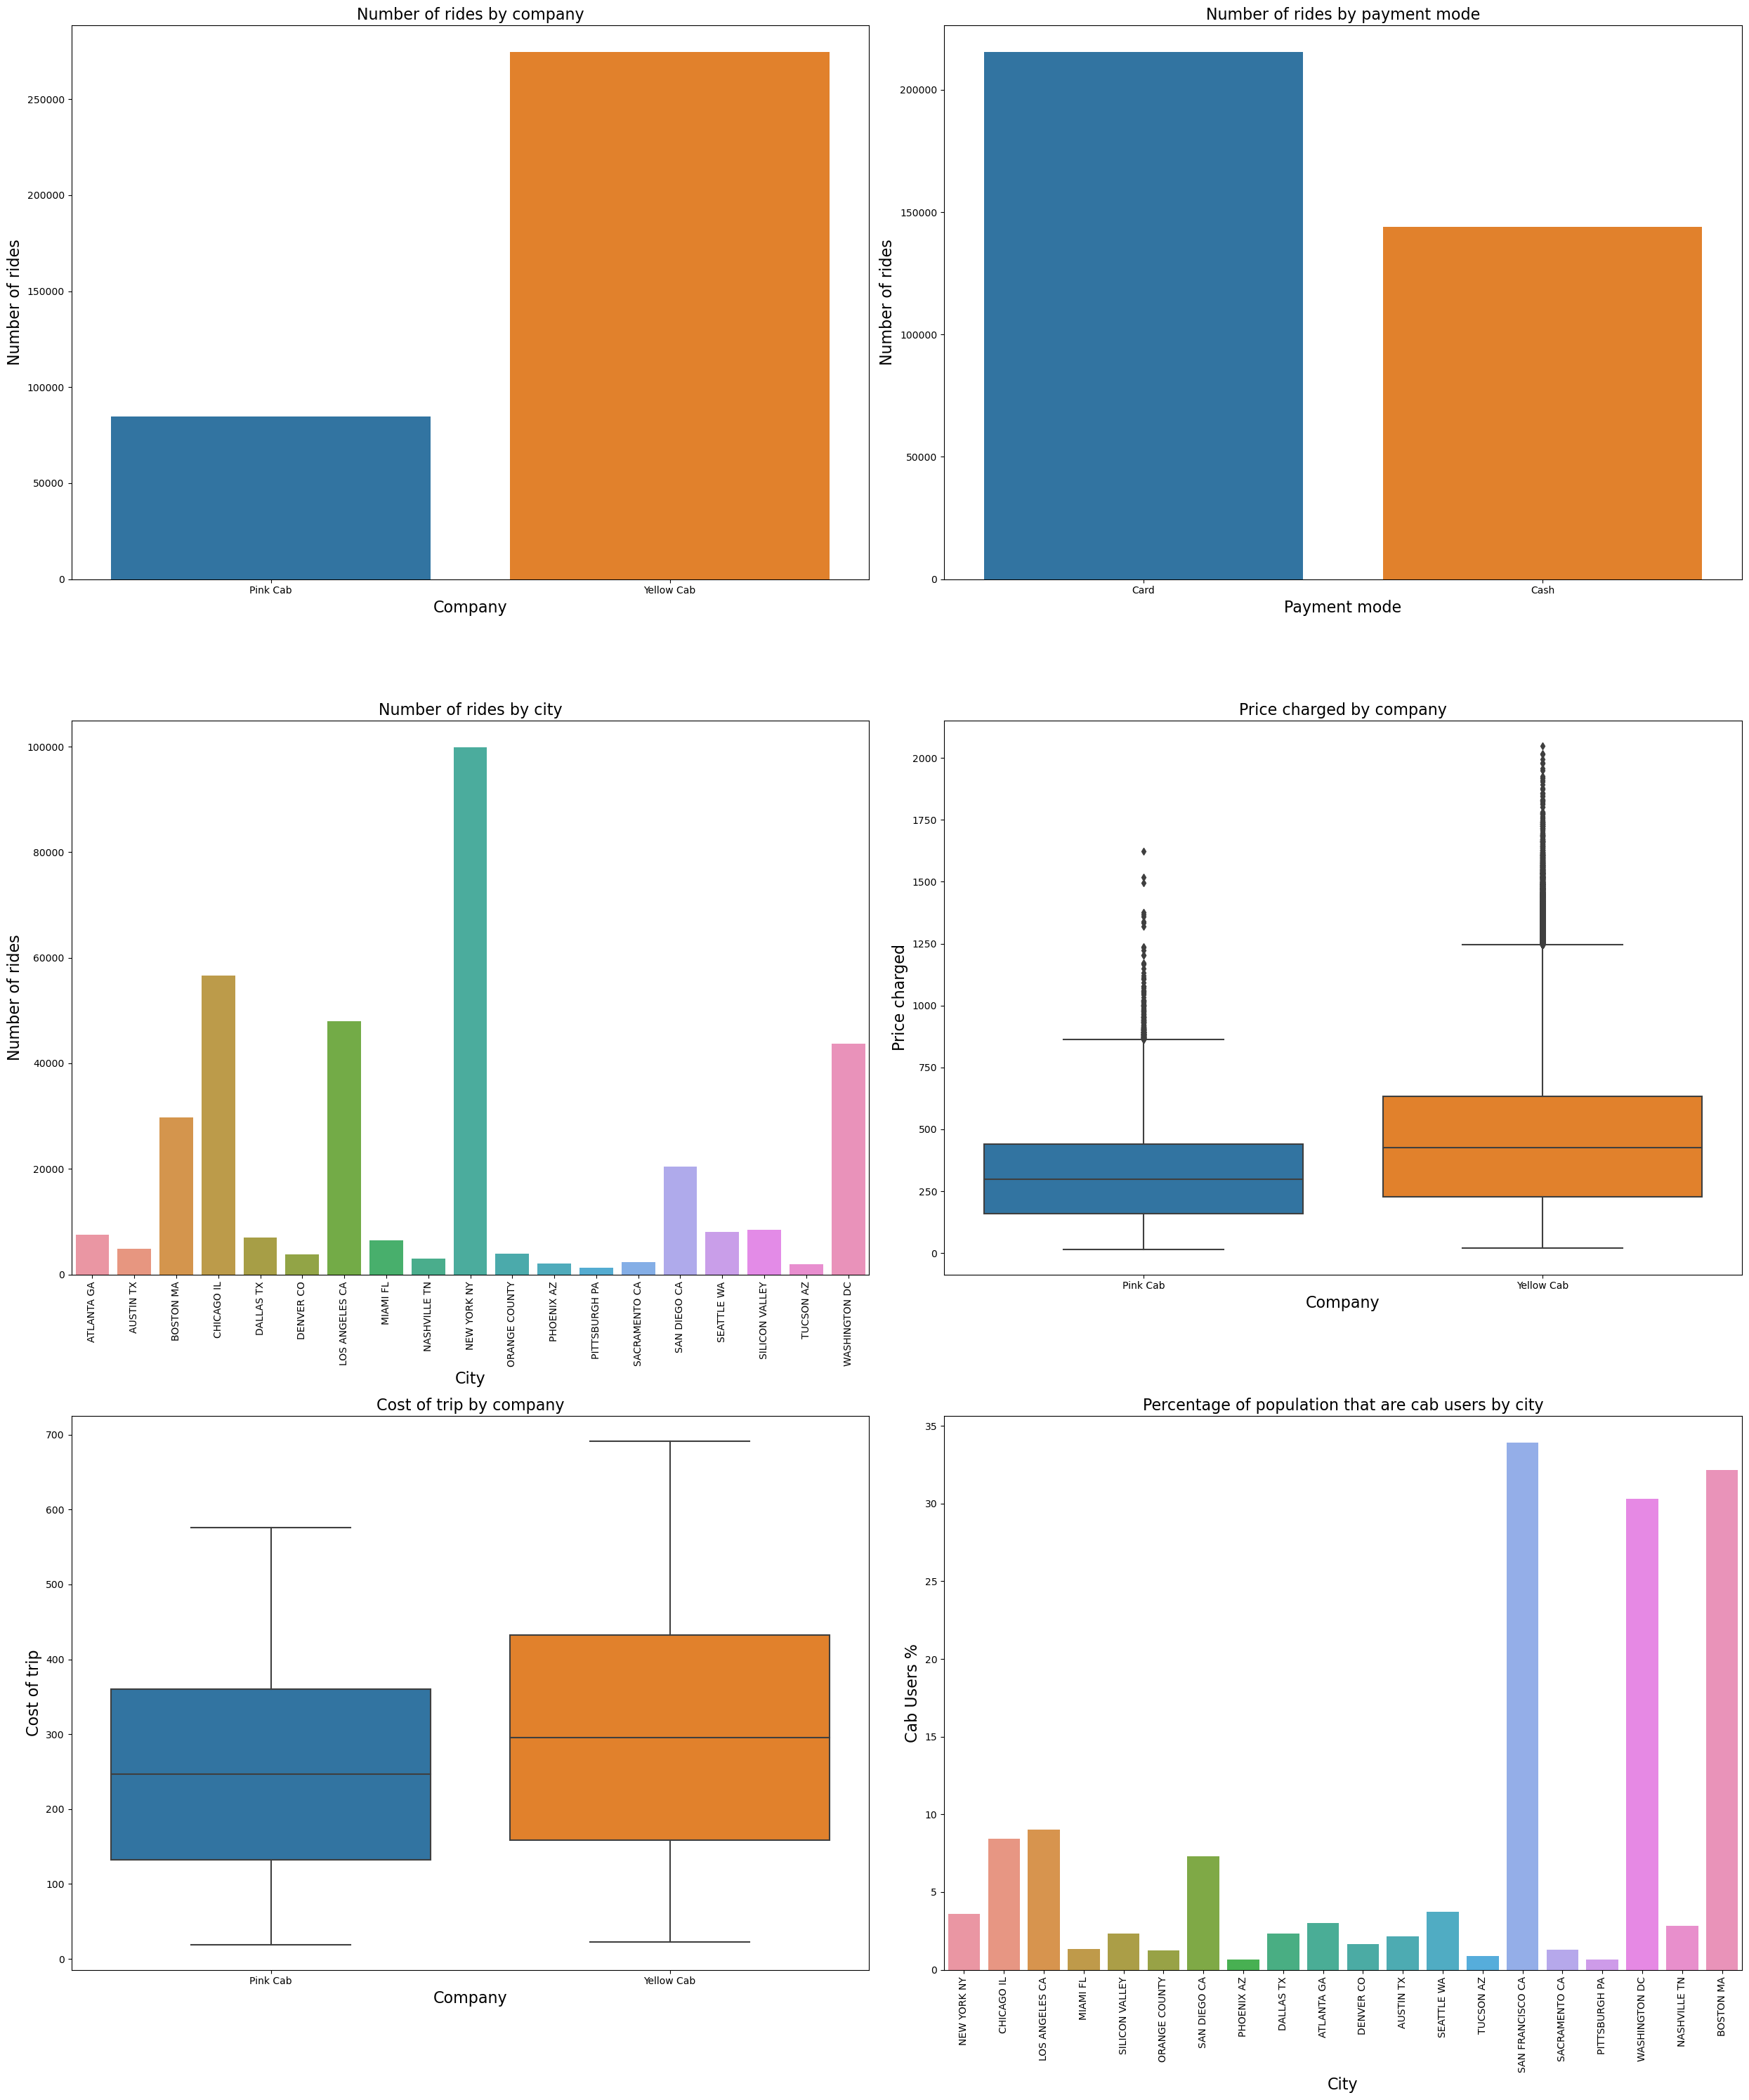

In [120]:
# Visualise the data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))

sns.countplot(x='Company', data = merged_df, ax=axs[0,0])
axs[0,0].set_title('Number of rides by company', fontsize = 16)
axs[0,0].set_xlabel('Company', fontsize = 16)
axs[0,0].set_ylabel('Number of rides', fontsize = 16)

sns.countplot(x='Payment_Mode', data = merged_df, ax=axs[0,1])
axs[0,1].set_title('Number of rides by payment mode', fontsize = 16)
axs[0,1].set_xlabel('Payment mode', fontsize = 16)
axs[0,1].set_ylabel('Number of rides', fontsize = 16)

sns.countplot(x='City', data = merged_df, ax=axs[1,0])
axs[1,0].set_title('Number of rides by city', fontsize = 16)
axs[1,0].set_xlabel('City', fontsize = 16)
axs[1,0].set_ylabel('Number of rides', fontsize = 16)
axs[1,0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Company', y='Price Charged', data = merged_df, ax=axs[1,1])
axs[1,1].set_title('Price charged by company', fontsize = 16)
axs[1,1].set_xlabel('Company', fontsize = 16)
axs[1,1].set_ylabel('Price charged', fontsize = 16)

sns.boxplot(x='Company', y='Cost of Trip', data = merged_df, ax=axs[2,0])
axs[2,0].set_title('Cost of trip by company', fontsize = 16)
axs[2,0].set_xlabel('Company', fontsize = 16)
axs[2,0].set_ylabel('Cost of trip', fontsize = 16)

sns.barplot(x= 'City', y='Cab Users %', data=city_df, ax=axs[2,1])
axs[2,1].set_title('Percentage of population that are cab users by city', fontsize = 16)
axs[2,1].set_xlabel('City', fontsize = 16)
axs[2,1].set_ylabel('Cab Users %', fontsize = 16)
axs[2,1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

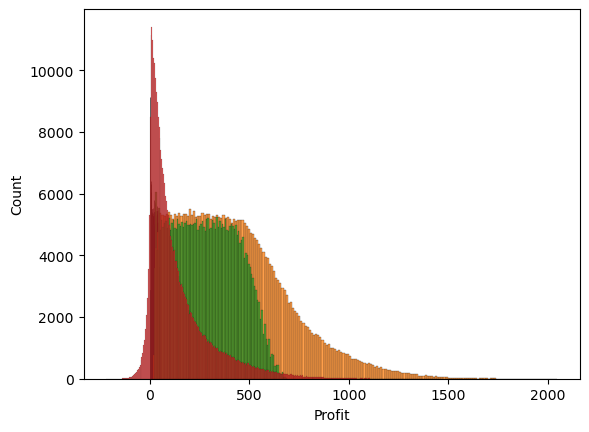

In [121]:
# Explore the data using various visualizations
sns.histplot(data=merged_df, x="KM Travelled")
plt.xlabel("KM Travelled")

sns.histplot(data=merged_df, x="Price Charged")
plt.xlabel("Price Charged")

sns.histplot(data=merged_df, x="Cost of Trip")
plt.xlabel("Cost of Trip")

sns.histplot(data=merged_df, x="Profit")
plt.xlabel("Profit")
plt.show()

/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_8819/1901714846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


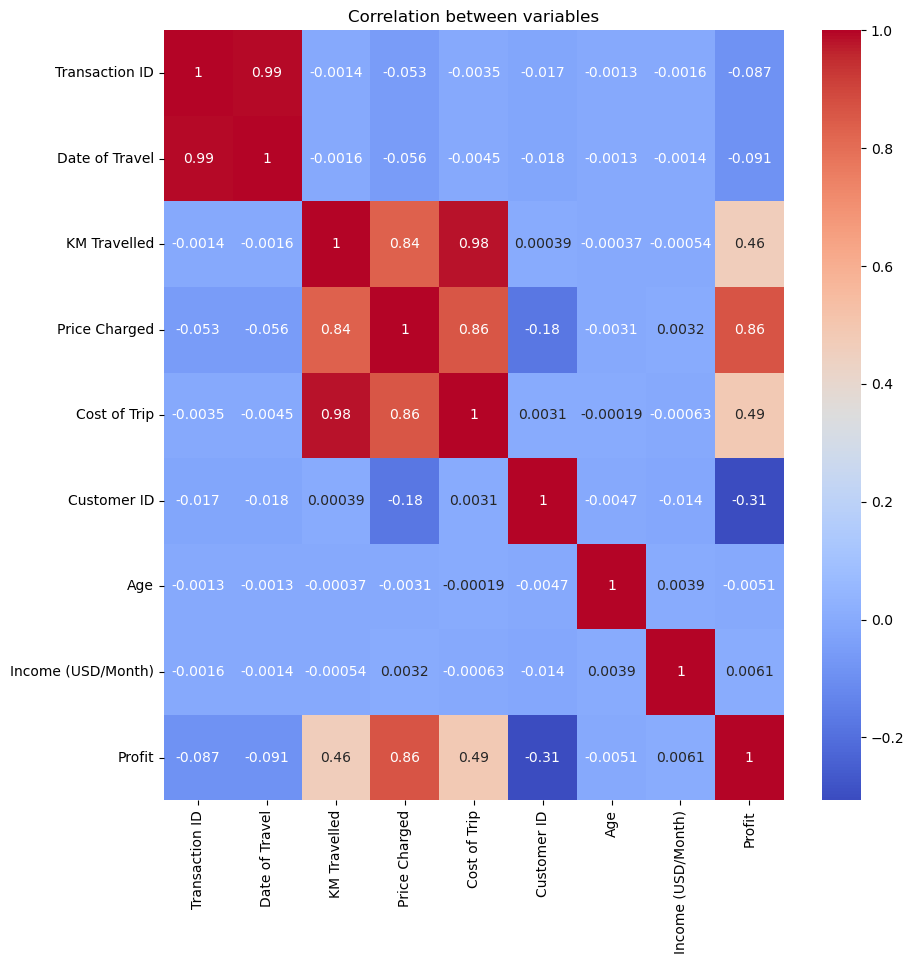

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()